In [1]:
import keras
imdb = keras.datasets.imdb

Using TensorFlow backend.


In [0]:
VOCAB_SIZE = 10000
INDEX_FROM = 2
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,
index_from=INDEX_FROM)

In [0]:
#Check
print('Sample review:', train_data[0])
print('\n Sample label:', train_labels[1])

Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]

 Sample label: 0


In [0]:
word_index = imdb.get_word_index()

word_index = {k:(v+2) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  

In [0]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500

preprocessed_train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        maxlen=MAXIMUM_LENGTH)

preprocessed_test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        maxlen=MAXIMUM_LENGTH)

In [0]:
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Lambda, Dense, LSTM,Embedding

EMBED_SIZE=100

model = Sequential() 

model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAXIMUM_LENGTH)) 

#input_array = np.random.randint(1000, size=(32, 10))
model.add(LSTM(100)) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


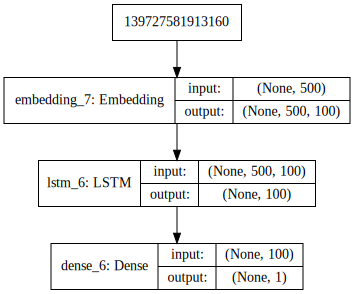

In [0]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils

SVG(vis_utils.model_to_dot(
model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [0]:
X_val = np.array(preprocessed_train_data[:2000])
y_val = np.array(train_labels[:2000])

partial_X_train = np.array(preprocessed_train_data[2000:])
partial_y_train = np.array(train_labels[2000:])


In [0]:
#epochs = 3

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 330s 14ms/step - loss: 0.5150 - acc: 0.7477 - val_loss: 0.5050 - val_acc: 0.7480
Epoch 2/3
23000/23000 [==============================] - 328s 14ms/step - loss: 0.2987 - acc: 0.8813 - val_loss: 0.2888 - val_acc: 0.8815
Epoch 3/3
23000/23000 [==============================] - 328s 14ms/step - loss: 0.2046 - acc: 0.9232 - val_loss: 0.3226 - val_acc: 0.8620


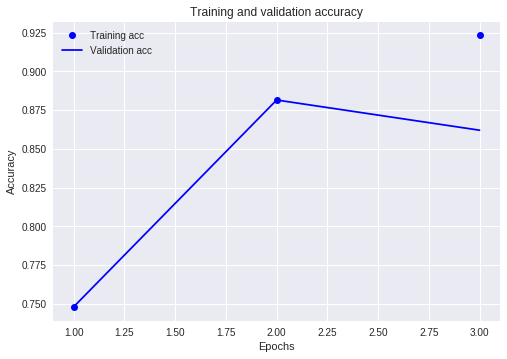

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
results = model.evaluate(X_val, y_val)

print('test_loss:', results[0], 'test_accuracy:', results[1])

2000/2000 [==============================] - 7s 3ms/step
test_loss: 0.3225645577907562 test_accuracy: 0.862


In [0]:
word_embeddings=model.get_layer('embedding_1').get_weights()[0]
print(word_embeddings)

[[ 3.7106041e-02  4.4726696e-02  1.8455412e-02 ...  3.2940295e-02
   2.9304888e-02  3.6790159e-02]
 [-4.9508750e-02 -2.3498237e-02  6.4023249e-03 ... -4.5046199e-02
  -7.6510012e-05  4.4935297e-02]
 [ 2.2368144e-02 -3.4632504e-02 -2.8153230e-02 ... -1.6197078e-03
  -3.3135522e-02  1.0820329e-02]
 ...
 [-6.1594248e-03  1.4767375e-02 -3.4747194e-02 ... -3.0537058e-02
  -1.1120629e-02  2.8197277e-02]
 [ 4.3730821e-02  7.2753429e-03  3.3170592e-02 ... -3.3629656e-02
  -1.7313734e-03 -4.1686643e-02]
 [ 1.0423254e-02  1.7407682e-02  2.0408083e-02 ... -2.4495328e-02
   1.6284212e-03 -4.2839456e-02]]


In [0]:
print('Shape of word_embeddings:', word_embeddings.shape)

Shape of word_embeddings: (10000, 100)


In [7]:
word2idx = imdb.get_word_index()
#word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 10000}
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] =  2

idx2word= dict([(value, key) for (key, value) in word2idx.items()])
print(idx2word)

{1410: 'woods', 2347: 'hanging', 2291: 'woody', 6748: 'arranged', 2340: 'bringing', 1638: 'wooden', 4012: 'errors', 3232: 'dialogs', 361: 'kids', 5036: 'uplifting', 7095: 'controversy', 9880: 'projection', 7182: 'stern', 5623: 'morally', 5285: 'wang', 180: 'want', 2105: 'travel', 6704: 'barbra', 3932: 'dinosaurs', 354: 'wrong', 4762: 'subplots', 9094: 'welcomed', 6705: 'butcher', 1182: 'fit', 1929: 'screaming', 4289: 'fix', 9656: 'hurting', 301: 'effects', 8777: 'barton', 6194: 'ingrid', 7918: 'adapt', 4013: 'disturbed', 1287: 'purpose', 6794: 'olds', 886: 'needed', 1299: 'master', 5401: 'positively', 9838: 'zatoichi', 546: 'feeling', 5624: 'affairs', 7801: 'wholesome', 1359: 'cinematic', 4990: 'tech', 659: 'saying', 8424: 'padded', 5747: 'tempted', 7478: 'plate', 3901: 'altogether', 8778: 'lds', 1779: 'nicely', 4590: 'mummy', 774: 'lots', 9261: 'lotr', 9881: 'irs', 6889: 'ira', 7695: 'discipline', 875: 'nature', 3902: 'superficial', 2825: 'extent', 8779: 'bothers', 75: 'much', 6261: '

In [0]:
print(' '.join(idx2word[idx] for idx in train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [0]:
print(train_data[0])

[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


In [0]:
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

#print(word_embeddings)

                 0         1         2         3         4         5   \
woods      0.037106  0.044727  0.018455  0.020569 -0.007521  0.045846   
hanging   -0.049509 -0.023498  0.006402  0.000353  0.047090 -0.047817   
woody      0.022368 -0.034633 -0.028153  0.020097 -0.037865 -0.045028   
arranged   0.015924 -0.014469 -0.030019  0.047068 -0.047319  0.047596   
bringing  -0.005840  0.031954  0.023457 -0.038848 -0.020197 -0.032492   
wooden    -0.034365 -0.010299 -0.012188 -0.046548  0.018698  0.002555   
errors     0.037832  0.011043  0.025148 -0.016226 -0.047026  0.046320   
dialogs    0.039164 -0.031163  0.017572  0.001873  0.003440  0.037878   
kids       0.038651 -0.008559 -0.040334  0.042538  0.046189 -0.002312   
uplifting -0.044306 -0.028293 -0.000259  0.011424  0.048429 -0.048663   

                 6         7         8         9     ...           90  \
woods      0.026053 -0.037917 -0.032538  0.049445    ...     0.042547   
hanging   -0.004224 -0.006564  0.003284 -0.038285 

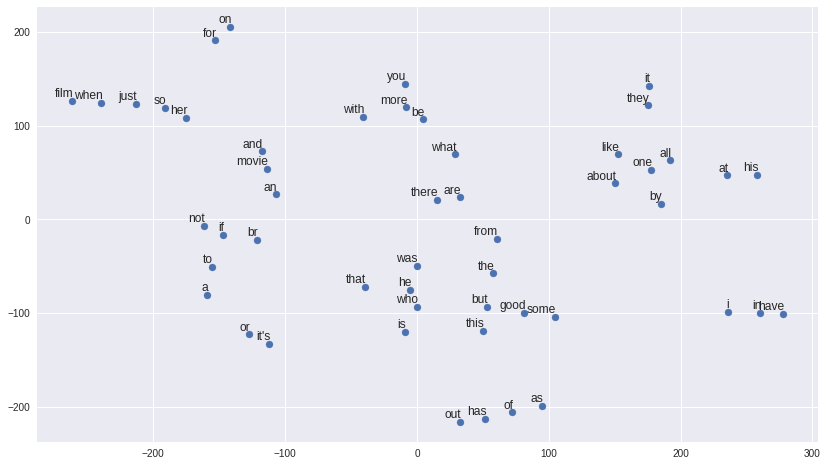

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
# starting from the first word
start = 3
plot_only = 54
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right',va='bottom')


In [8]:
#Add Dropouts
from keras.layers import Dropout
model2 = Sequential() 

model2.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAXIMUM_LENGTH)) 
model2.add(Dropout(0.2))
#input_array = np.random.randint(1000, size=(32, 10))
model2.add(LSTM(100)) 
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid')) 
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


In [10]:
history2 = model2.fit(partial_X_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 1031s 45ms/step - loss: 0.4974 - acc: 0.7688 - val_loss: 0.3992 - val_acc: 0.8335
Epoch 2/3
23000/23000 [==============================] - 746s 32ms/step - loss: 0.4276 - acc: 0.8075 - val_loss: 0.4257 - val_acc: 0.8035
Epoch 3/3
23000/23000 [==============================] - 450s 20ms/step - loss: 0.3566 - acc: 0.8433 - val_loss: 0.2904 - val_acc: 0.8820


In [0]:
results2 = model2.evaluate(X_val, y_val)

print('test_loss:', results2[0], 'test_accuracy:', results2[1])

2000/2000 [==============================] - 7s 3ms/step
test_loss: 0.6850770386457443 test_accuracy: 0.859


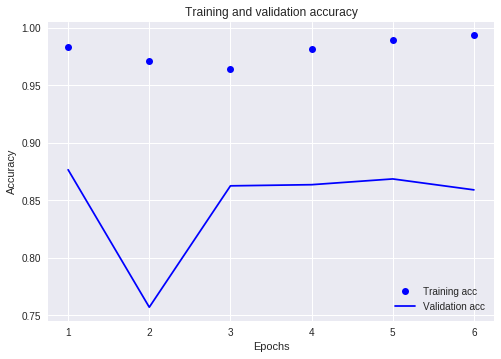

In [0]:
import matplotlib.pyplot as plt

history_dict2 = history2.history

acc = history_dict2['acc']
val_acc = history_dict2['val_acc']
loss = history_dict2['loss']
val_loss = history_dict2['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
from keras.layers import Dropout
model4 = Sequential() 

model4.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAXIMUM_LENGTH)) 
model4.add(Dropout(0.2))
#input_array = np.random.randint(1000, size=(32, 10))
model4.add(LSTM(100)) 
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid')) 
model4.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

In [0]:
history4 = model4.fit(partial_X_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=1,
                    validation_data=(X_val, y_val),
                    verbose=1)

In [0]:
results4 = model4.evaluate(X_val, y_val)

print('test_loss:', results4[0], 'test_accuracy:', results4[1])

2000/2000 [==============================] - 7s 3ms/step
test_loss: 0.29194868230819704 test_accuracy: 0.8845


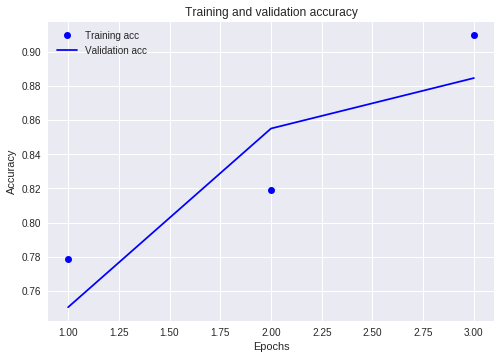

In [0]:
import matplotlib.pyplot as plt

history_dict4 = history3.history

acc = history_dict4['acc']
val_acc = history_dict4['val_acc']
loss = history_dict4['loss']
val_loss = history_dict4['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()